In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read data into system
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Get basic information and statistics on the dataset.
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [4]:
# We need to drop last two columns since we don't need it
data = data.iloc[:,:-2]

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
# Use pycaret to train models
from pycaret.classification import *
s = setup(data, target = 'Attrition_Flag', ignore_features = ['CLIENTNUM'])

,Description,Value
0,Session id,7789
1,Target,Attrition_Flag
2,Target type,Binary
3,Target mapping,"Attrited Customer: 0, Existing Customer: 1"
4,Original data shape,"(10127, 21)"
5,Transformed data shape,"(10127, 37)"
6,Transformed train set shape,"(7088, 37)"
7,Transformed test set shape,"(3039, 37)"
8,Ignore features,1
9,Ordinal features,1


In [7]:
# compare all models
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9726,0.9926,0.9889,0.9787,0.9838,0.8961,0.8969,0.2880
gbc,Gradient Boosting Classifier,0.9659,0.9882,0.9882,0.9716,0.9798,0.8686,0.8701,0.5370
rf,Random Forest Classifier,0.9558,0.9852,0.9862,0.9622,0.9740,0.8269,0.8301,0.3240
ada,Ada Boost Classifier,0.9554,0.9817,0.9787,0.9686,0.9736,0.8310,0.8317,0.2360
dt,Decision Tree Classifier,0.9307,0.8714,0.9588,0.9587,0.9587,0.7432,0.7436,0.0960
et,Extra Trees Classifier,0.9264,0.9717,0.9889,0.9281,0.9575,0.6824,0.7031,0.2910
lda,Linear Discriminant Analysis,0.9029,0.9206,0.9590,0.9279,0.9431,0.6120,0.6165,0.0920
ridge,Ridge Classifier,0.8971,0.0000,0.9815,0.9042,0.9413,0.5334,0.5652,0.0710
lr,Logistic Regression,0.8929,0.9074,0.9659,0.9118,0.9380,0.5459,0.5592,0.7740
qda,Quadratic Discriminant Analysis,0.8952,0.9130,0.9417,0.9343,0.9378,0.6041,0.6069,0.1090


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [8]:
# print best_model parameters
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7789, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


So our best model is Lightgbm. Now, we move and conduct hyperparameter tuning for our selected model.

In [9]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9746,0.9950,0.9916,0.9784,0.9850,0.9032,0.9040
1,0.9746,0.9920,0.9899,0.9800,0.9849,0.9039,0.9043
2,0.9732,0.9868,0.9933,0.9752,0.9842,0.8967,0.8983
3,0.9690,0.9901,0.9866,0.9767,0.9816,0.8825,0.8830
4,0.9676,0.9871,0.9849,0.9767,0.9808,0.8776,0.8779
5,0.9647,0.9919,0.9916,0.9672,0.9793,0.8620,0.8650
6,0.9619,0.9874,0.9815,0.9733,0.9774,0.8563,0.8566
7,0.9633,0.9900,0.9782,0.9782,0.9782,0.8641,0.8641
8,0.9689,0.9883,0.9916,0.9720,0.9817,0.8790,0.8809


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


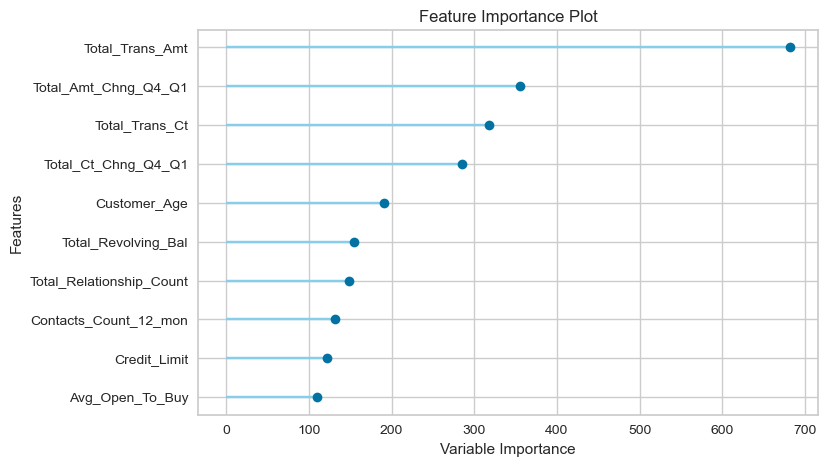

In [13]:
# Plot Feature Importance in our model
plot_model(best_model, plot = 'feature')

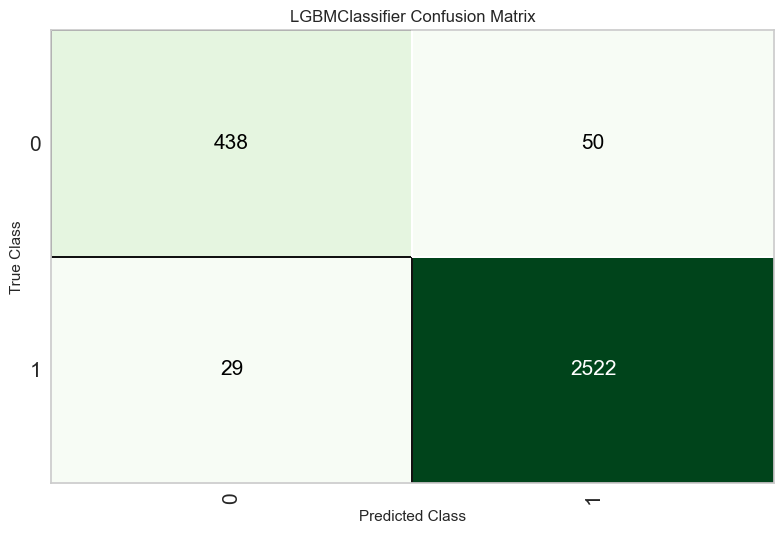

In [14]:
# Confusion Matrix
plot_model(best_model, plot = 'confusion_matrix')